In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [ ]:
path="../Dataset/femaleHeaded.xlsx"
data=pd.read_excel(path)

In [47]:
data = data[data['Household Size'] != 'All Households']

In [48]:
data.head

<bound method NDFrame.head of                        Area Name Division  Ownership Household Size  \
1                          INDIA    Total      Total              1   
2                          INDIA    Total      Total              2   
3                          INDIA    Total      Total              3   
4                          INDIA    Total      Total              4   
5                          INDIA    Total      Total              5   
...                          ...      ...        ...            ...   
3451   ANDAMAN & NICOBAR ISLANDS    Urban  Any Other              3   
3452   ANDAMAN & NICOBAR ISLANDS    Urban  Any Other              4   
3453   ANDAMAN & NICOBAR ISLANDS    Urban  Any Other              5   
3454   ANDAMAN & NICOBAR ISLANDS    Urban  Any Other              7   
3455   ANDAMAN & NICOBAR ISLANDS    Urban  Any Other              9   

      Total number of female headed households  No exclusive room        1  \
1                                      

In [49]:
room_columns = ['No exclusive room', 1, 2, 3, 4, 5, '6 and above']
data['Total Rooms'] = data[room_columns].sum(axis=1)
data_melted = data.melt(id_vars=['Area Name', 'Division', 'Ownership'], 
                        value_vars=room_columns, 
                        var_name='Room Category', 
                        value_name='Number of Households')

In [50]:
data_melted['Percentage'] = (data_melted['Number of Households'] / 
                             data_melted.groupby(['Area Name', 'Division'])['Number of Households'].transform('sum')) * 100


In [51]:
data_melted.head

<bound method NDFrame.head of                         Area Name Division  Ownership      Room Category  \
0                           INDIA    Total      Total  No exclusive room   
1                           INDIA    Total      Total  No exclusive room   
2                           INDIA    Total      Total  No exclusive room   
3                           INDIA    Total      Total  No exclusive room   
4                           INDIA    Total      Total  No exclusive room   
...                           ...      ...        ...                ...   
21163   ANDAMAN & NICOBAR ISLANDS    Urban  Any Other        6 and above   
21164   ANDAMAN & NICOBAR ISLANDS    Urban  Any Other        6 and above   
21165   ANDAMAN & NICOBAR ISLANDS    Urban  Any Other        6 and above   
21166   ANDAMAN & NICOBAR ISLANDS    Urban  Any Other        6 and above   
21167   ANDAMAN & NICOBAR ISLANDS    Urban  Any Other        6 and above   

       Number of Households  Percentage  
0              

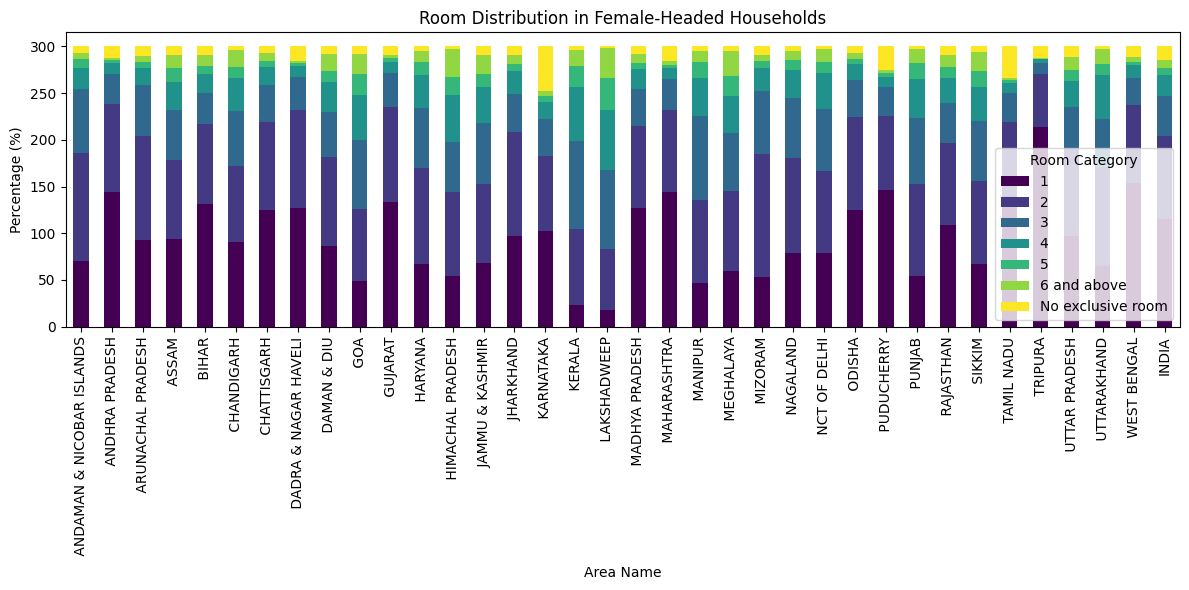

In [52]:
pivot_data = data_melted.pivot_table(index='Area Name', 
                                     columns='Room Category', 
                                     values='Percentage', aggfunc='sum')

pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title("Room Distribution in Female-Headed Households")
plt.ylabel("Percentage (%)")
plt.xlabel("Area Name")
plt.legend(title='Room Category')
plt.tight_layout()
plt.show()

In [53]:
le = LabelEncoder()
data['Division_Encoded'] = le.fit_transform(data['Division'])
X = data[['Division_Encoded', 'Household Size']]
y = data['Ownership']

In [54]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

In [55]:
sample_data = [[0, 3]]  # Example: Division_Encoded=0, Household Size=3
prediction = clf.predict(sample_data)
print("Predicted Ownership:", prediction)

Predicted Ownership: ['Any Other']


c:\Users\varni\miniconda3\envs\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
